In [1]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = r.get('https://www.airlinequality.com/airline-reviews/air-serbia')

In [3]:
data.status_code

200

In [4]:
data.headers

{'Date': 'Mon, 28 Aug 2023 18:58:24 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding,User-Agent', 'last-modified': 'Mon, 28 Aug 2023 18:20:34 GMT', 'Cache-Control': 'max-age=2592000', 'expires': 'Wed, 27 Sep 2023 18:58:24 GMT', 'x-powered-by': 'PleskLin', 'CF-Cache-Status': 'DYNAMIC', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=B3ER5YyUHptmZIRuSjprfj695uY585%2BUzzO6Q6TfchMEiJiIkw9wn66DxTbN5YBXEVPCJWbNHBFjSn7rabV3IR5JI1ET8xNUUsZZntKv03SNXT%2BmJrZx0UsJwHn4gqc3IPWpwf%2B3y9gvKAyrt5ccGEQI6xtO"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '7fdec9180d8f1e54-FRA', 'Content-Encoding': 'gzip', 'alt-svc': 'h3=":443"; ma=86400'}

In [5]:
Soup_data = BeautifulSoup(data.text , 'html.parser')

In [6]:
# print(Soup_data.prettify())

In [7]:
Review_headers = Soup_data.find_all(class_ = "review-rating-header")

In [8]:
Review_head_key = []
for i in Review_headers:
    Review_head_key.append(i.get_text())

In [9]:
Review_Headers1 = Soup_data.find_all(class_ = "review-value")


In [10]:
Review_head_value = []
for i in Review_Headers1:
    Review_head_value.append(i.get_text())

In [11]:
driver = webdriver.Chrome()

In [12]:
driver.get('https://www.airlinequality.com/review-pages/a-z-airline-reviews/airline-review-ratings/')

In [13]:
# data = driver.find_elements(By.XPATH  , '//div[starts-with(@class , "aggregateRow")]')

In [14]:
wait =  WebDriverWait(driver , 10) # explicit wait

In [15]:
list = wait.until(EC.presence_of_all_elements_located((By.XPATH , '//div[starts-with(@class , "aggregateRow")]')))

In [16]:
for i in list:
    AIRLINE = i.find_elements(By.XPATH  , '//div[contains(@class , "aggregateColumn_two")]')
    SCORE =  i.find_elements(By.XPATH  , '//div[contains(@class , "aggregateColumn_three")]')
    REVIEWS = i.find_elements(By.XPATH  , '//div[contains(@class , "aggregateColumn_four")]') 

In [17]:
airline_column = []
for i in AIRLINE:
    airline_column.append(i.text.split())
    

In [18]:
airline = []
for i in range(len(airline_column)):
    if airline_column[i] == ['AIRLINE']:
        continue
    elif len(airline_column[i]) >= 1:
        cat = airline_column[i]
        join_str = " ".join(cat)
        airline.append(join_str)  

In [19]:
len(airline)

113

In [20]:
score_column = []
for i in SCORE:
    score_column.append(i.text.split())

In [21]:
score = []
for i in range(len(score_column)):
    if len(score_column[i]) >=2:
        continue
    elif score_column[i] == []:
        continue
    score.append(score_column[i])

In [22]:
score = [item[0] for item in score]

In [23]:
len(score)

113

In [24]:
review = []
for i in  REVIEWS:
    if i.text == "REVIEWS":
        continue
    elif i.text.split() == []:
        break
    review.append(i.text.split())

In [25]:
review = [item[0]  for item in review]

In [26]:
len(review)

113

In [27]:
data = {'Airline' : airline , 
        'Score (max 10)' : score ,
        'Reviews' : review}

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,Airline,Score (max 10),Reviews
0,AB Aviation,4,3
1,Adria Airways,6,91
2,Aegean Airlines,7,745
3,Aer Lingus,5,974
4,Aero VIP,9,3


In [30]:
df.dtypes

Airline           object
Score (max 10)    object
Reviews           object
dtype: object

In [31]:
df['Score (max 10)'] = df['Score (max 10)'].astype(int)

In [32]:
df['Reviews'] = df['Reviews'].astype(int)

In [33]:
df.to_csv('Airline_Customer_Review_Ratings.csv' , index = False)

In [34]:
import seaborn as sns

In [35]:
sns.set()

<Axes: >

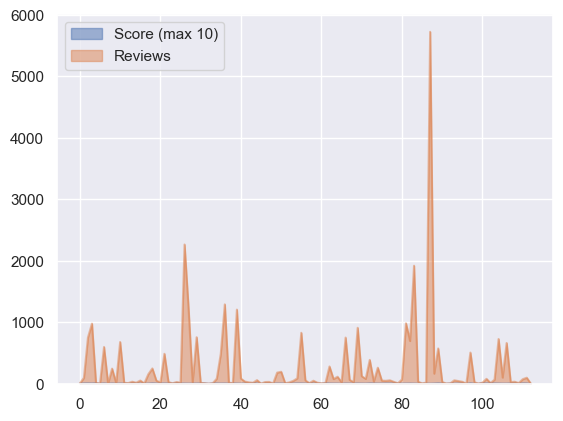

In [36]:
df.plot.area(alpha = 0.5)

<Axes: ylabel='Frequency'>

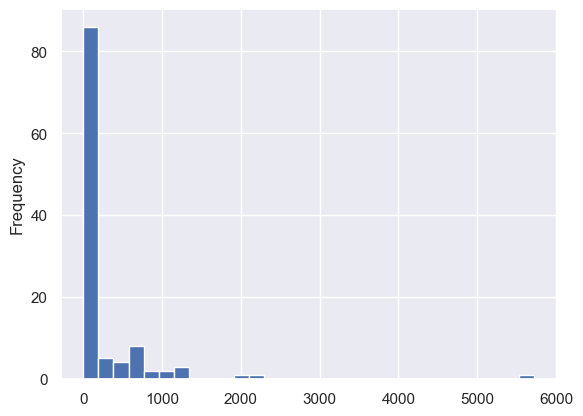

In [37]:
df['Reviews'].plot.hist(bins = 30)

<Axes: xlabel='SCORE', ylabel='FREQUENCY'>

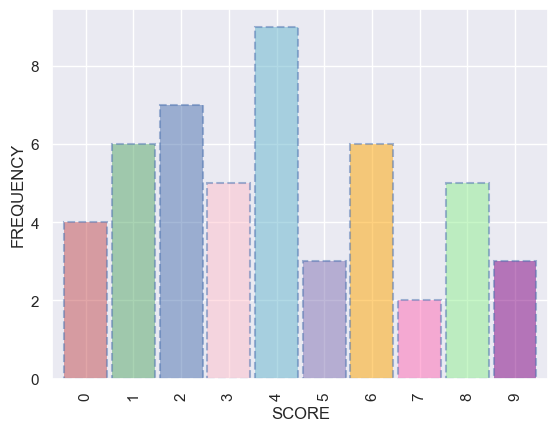

In [38]:
df['Score (max 10)'].head(10).plot.bar(color = ['r','g','b','pink','c','m','orange','hotpink','lightgreen','purple'] , width = 0.9 ,
                                 alpha = 0.5 , ec = 'b' , ls = '--' , lw = 1.5 , xlabel = 'SCORE' , ylabel = 'FREQUENCY')

<Axes: xlabel='Score (max 10)', ylabel='Reviews'>

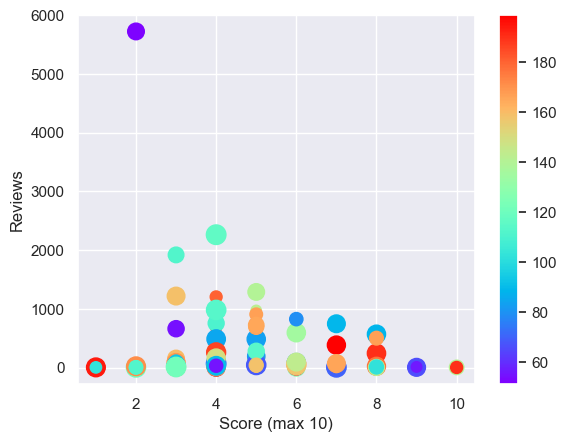

In [39]:
import numpy as np
df.plot.scatter(x = 'Score (max 10)' , y = 'Reviews' , color = np.random.randint(50,200,size = (113)) ,
                s = np.random.randint(50,200,size = (113)) , cmap = 'rainbow')

<Axes: ylabel='Density'>

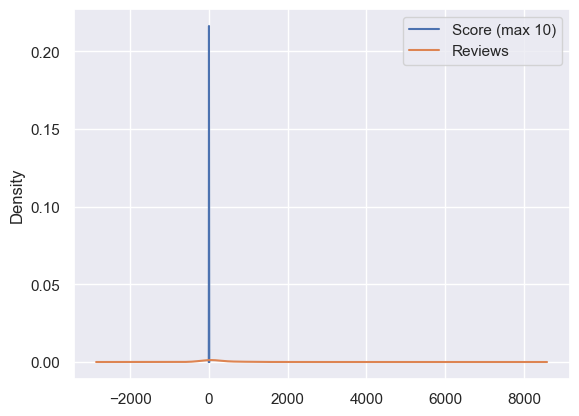

In [40]:
df.plot.kde()

In [41]:
driver.close()

In [42]:
from matplotlib import pyplot as plt

In [43]:
data = df['Reviews'].head()
labels = df["Airline"].head()
exp = [0.1,0,0,0,0]
color = ["pink","blue","green","lightgreen","orange"]

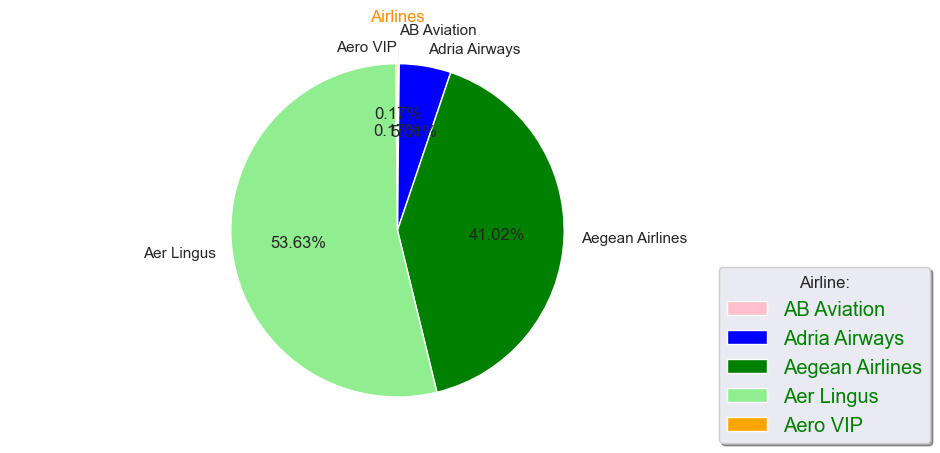

In [44]:
plt.figure(figsize = (10,5))
plt.pie(x = data,colors=color,labels=labels,autopct="%.2f%%",explode=exp,startangle=90,counterclock=False)
plt.axis("equal")
plt.title("Airlines",color="darkorange")
plt.legend(title = "Airline:",loc = "lower right" , labelcolor = "green" , shadow = True , fontsize = "large" , 
           bbox_to_anchor = (1,-0.1,0.2,1.4))

In [45]:
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
import cufflinks as cf

In [46]:
init_notebook_mode(connected=True)
cf.go_offline()

In [47]:
df['Reviews'].iplot()

In [48]:
df[['Reviews' , 'Score (max 10)']].head(10).iplot(kind = 'bar' , bins = 50)

In [49]:
df[['Reviews' , 'Score (max 10)']].head(10).iplot(kind = 'spread')

In [50]:
import plotly.express as px

In [51]:
fig = px.bar(df.head() , x = 'Airline' , y = 'Reviews' , color = 'Airline')
fig.show()

In [52]:
fir = px.area(df.head() , x = 'Reviews' , y = 'Score (max 10)' ,  color = 'Airline')
fir.show()